# 로지스틱 회귀분석

In [1]:
import tensorflow as tf
import numpy as np

tf.random.set_seed(0)

#### MNIST dataset parameters.

In [2]:
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).

#### Prepare MNIST data.

In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### Convert from uint8 to float32 and
- normalize images value from [0, 255] to [0, 1].
- (uint8: Unsigned integer (0 to 255))

In [4]:
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32) / 255.
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32) / 255.

#### Flatten images to 1-D vector of 784 features (28*28).

In [5]:
x_train = tf.reshape(x_train, (-1, num_features)) # [b, 28, 28] => [b, 784]
x_test = tf.reshape(x_test, (-1, num_features))  # [b, 28, 28] => [b, 784]

#### 초기 W, b 설정

In [6]:
# Weight of shape [784, 10], the 28*28 image features, and total number of classes.
W = tf.Variable(tf.random.uniform([num_features, num_classes]), name="weight")
# Bias of shape [10], the total number of classes.
b = tf.Variable(tf.random.uniform([num_classes]), name="bias")

#### 로지스틱 회귀, 로스, 정확도 함수 정의

In [10]:
# Logistic regression (Wx + b).
def logistic_regression(x):
    # Apply softmax to normalize the logits to a probability distribution.
    return tf.nn.softmax(tf.matmul(x, W) + b)

# Cross-Entropy loss function.
def cross_entropy(y_pred, y_true):
    # Encode label to a one hot vector.
    y_true = tf.one_hot(y_true, depth=num_classes)
    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    # Compute cross-entropy.
    return -tf.reduce_mean(tf.reduce_sum(y_true * tf.math.log(y_pred)))

def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Logistic regression

In [11]:
#test로스를 최소화 하는 w,b 찾기
epochs = 32
batch_size = 200
learning_rate = 0.01
optimizer = tf.optimizers.SGD(learning_rate)


train_data = tf.data.Dataset.from_tensor_slices((x_train,y_train))
training_batch = train_data.batch(batch_size).repeat(epochs)

# Interval for showing the training status.
display_step = 300

# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(training_batch, 1):
    # Run the optimization to update W and b values.
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)

    # Compute gradients.
    trainable_variables = [W, b]
    gradients = g.gradient(loss, trainable_variables)
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))
    
    if step % display_step == 0:
        pred = logistic_regression(x_test)
        acc = accuracy(pred,y_test)
        loss = cross_entropy(pred, y_test)
        print("stpe: %i, loss: %.4f, acc: %.4f" % (step , loss, acc))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
stpe: 300, loss: 4615.1016, acc: 0.8866
stpe: 600, loss: 4583.1279, acc: 0.8861
stpe: 900, loss: 4355.8467, acc: 0.8907
stpe: 1200, loss: 4209.4097, acc: 0.8938
stpe: 1500, loss: 4110.3721, acc: 0.8956
stpe: 1800, loss: 4036.7368, acc: 0.8970
stpe: 2100, loss: 3985.3679, acc: 0.8981
stpe: 2400, loss: 3946.7769, acc: 0.8990
stpe: 2700, loss: 3916.7271, acc: 0.9002
stpe: 3000, loss: 3892.4924, acc: 0.9010
stpe: 3300, loss: 3872.3047, acc: 0.9017
stpe: 3600, loss: 3855.0247, acc: 0.9025
stpe: 3900, loss: 3839.9829, acc: 0.9027
stpe: 4200, loss: 3826.7998, acc: 0.9028
stpe: 4500, loss: 3815.2524, acc: 0.9032
stpe: 4800, loss: 3805.1907, acc: 0.9034
stpe: 5100, loss: 3798.2112, acc: 0.9039
stpe: 5400, loss: 3791.6011, acc: 0.9043
stpe: 5700, loss: 3785.7639, acc: 0.9045
stpe: 6000, loss: 3780.7661, acc: 0.9046
stpe: 6300, loss: 3776.5737, acc: 0.9050
stpe: 6600, loss: 3773.1079, acc: 0.9052
stpe: 6

In [12]:
pred = logistic_regression(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.905400


#### 결과 시각화

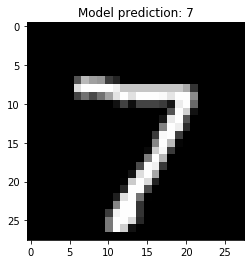

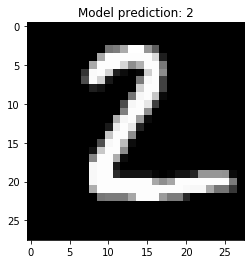

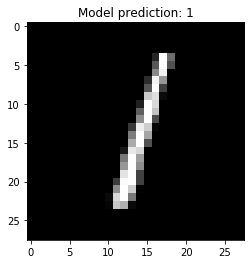

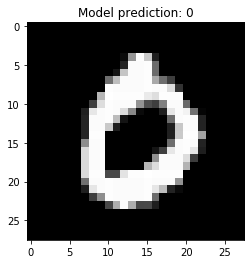

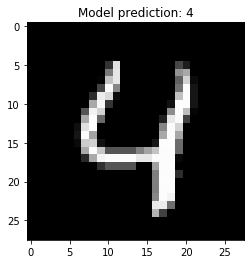

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline



# Predict 5 images from validation set.
n_images = 5
test_images = x_test[:n_images,]
predictions = logistic_regression(test_images)
# Display image and model prediction.
for i in range(n_images):
    title = "Model prediction: %i" % np.argmax(predictions.numpy()[i,])
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.title(title)
    plt.show()

# Keras를 사용한 로지스틱 회귀

In [14]:
# Resets graph identifiers.
tf.keras.backend.reset_uids()
from tensorflow.keras import layers, Sequential

#### 로지스틱 회귀 레이어

In [15]:
# logistic_regression = layers.Dense(num_classes, activation='softmax') 
logistic_regression = Sequential([
    layers.Dense(num_classes, activation='softmax')])
logistic_regression.build(input_shape=(None, num_features))
logistic_regression.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [16]:
#test로스를 최소화 하는 w,b 찾기
epochs = 32
batch_size = 200
learning_rate = 0.01
optimizer = tf.optimizers.SGD(learning_rate)

train_data = tf.data.Dataset.from_tensor_slices((x_train,y_train))
training_batch = train_data.batch(batch_size).repeat(epochs)


# Interval for showing the training status.
display_step = 300

# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(training_batch, 1):
    # Run the optimization to update W and b values.
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)

    # Compute gradients.
    gradients = g.gradient(loss, logistic_regression.trainable_variables)
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, logistic_regression.trainable_variables))
    
    if step % display_step == 0:
        pred = logistic_regression(x_test)
        acc = accuracy(pred,y_test)
        loss = cross_entropy(pred, y_test)
        print("stpe: %i, loss: %.4f, acc: %.4f" % (step , loss, acc))


# Accuracy
pred = logistic_regression(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))

stpe: 300, loss: 24273.1641, acc: 0.8128
stpe: 600, loss: 24267.4492, acc: 0.8136
stpe: 900, loss: 4256.1865, acc: 0.8926
stpe: 1200, loss: 4122.3330, acc: 0.8974
stpe: 1500, loss: 4035.5779, acc: 0.8985
stpe: 1800, loss: 3963.5083, acc: 0.8997
stpe: 2100, loss: 3917.3511, acc: 0.9006
stpe: 2400, loss: 3890.8721, acc: 0.9015
stpe: 2700, loss: 3869.1899, acc: 0.9012
stpe: 3000, loss: 3851.7209, acc: 0.9019
stpe: 3300, loss: 3837.4302, acc: 0.9023
stpe: 3600, loss: 3825.6274, acc: 0.9025
stpe: 3900, loss: 3815.7935, acc: 0.9028
stpe: 4200, loss: 3807.5269, acc: 0.9035
stpe: 4500, loss: 3800.5474, acc: 0.9038
stpe: 4800, loss: 3796.2227, acc: 0.9040
stpe: 5100, loss: 3792.0808, acc: 0.9044
stpe: 5400, loss: 3788.4426, acc: 0.9042
stpe: 5700, loss: 3785.3525, acc: 0.9045
stpe: 6000, loss: 3782.7778, acc: 0.9045
stpe: 6300, loss: 3780.6707, acc: 0.9048
stpe: 6600, loss: 3778.9800, acc: 0.9051
stpe: 6900, loss: 3777.6567, acc: 0.9052
stpe: 7200, loss: 3776.6558, acc: 0.9053
stpe: 7500, loss: